In [20]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [3]:
# Load in just the columns we need from Maria's big dataset
df = pd.read_csv('mariaData.csv')
df = df[['ProlificParticipantID', 'font', 'logBouma', 'rsvpReadingSpeed']]
df['logRSVP'] = np.log10(df['rsvpReadingSpeed'])

In [4]:
df.head()

,ProlificParticipantID,font,logBouma,rsvpReadingSpeed,logRSVP
0,5563984afdf99b672b5749b6,Omfug,-0.129397,636.487400,2.803790
1,5563984afdf99b672b5749b6,TimesNewRoman,-0.770351,462.581968,2.665189
2,5563984afdf99b672b5749b6,Zapfino,NaN,370.415773,2.568689
3,5563984afdf99b672b5749b6,Omfug,0.062502,264.183655,2.421906
4,5563984afdf99b672b5749b6,TimesNewRoman,-0.602134,423.924643,2.627289


In [5]:
# Create separate columns for logBouma and logRSVP for each font
df_wide = (
    df.pivot_table(
        index=['ProlificParticipantID'],
        columns='font',
        values=['logBouma','logRSVP']
    ).reset_index()
)

In [6]:
df_wide.head()

ProlificParticipantID logBouma                                       \
font                             Agoesa     Arial Baskerville Caslon Courier   
0     5563984afdf99b672b5749b6      NaN       NaN         NaN    NaN     NaN   
1     55b2d3f2fdf99b525bc839aa      NaN       NaN         NaN    NaN     NaN   
2     55ec49b67480920010aaa4e8      NaN       NaN         NaN    NaN     NaN   
3     5608a73fd7def20012b7389d      NaN -0.968167         NaN    NaN     NaN   
4     5658000ca9872d0011e1ba26      NaN       NaN         NaN    NaN     NaN   

                                            ...   logRSVP             \
font Edwardian   Extenda  Frutiger Georgia  ...     Omfug Optimistic   
0          NaN       NaN       NaN     NaN  ...  2.612848        NaN   
1          NaN       NaN       NaN     NaN  ...  2.823243        NaN   
2          NaN       NaN       NaN     NaN  ...  2.513623        NaN   
3          NaN -0.611771       NaN     NaN  ...       NaN        NaN   
4          NaN       NaN -1.017779     NaN  ...       NaN        NaN   

                                                                           \
font ProximaNova Rollerscript     Sabon ScarletWood TheSans TimesNewRoman   
0            NaN          NaN       NaN         NaN     NaN      2.646239   
1            NaN          NaN       NaN         NaN     NaN      2.948219   
2            NaN          NaN       NaN         NaN     NaN      2.807362   
3            NaN          NaN       NaN         NaN     NaN           NaN   
4            NaN          NaN  2.991738         NaN     NaN           NaN   

                     
font Tiny   Zapfino  
0     NaN  2.436402  
1     NaN  2.563493  
2     NaN  2.603427  
3     NaN       NaN  
4     NaN       NaN  

[5 rows x 49 columns]

In [7]:
df_wide.to_csv('crowdingRSVP_fonts.csv')

In [8]:
def correlation_fonts(df, font1, font2):
    '''
    Takes in a df and two fonts and returns the Pearson R and p-value
    with font1 logBouma and font2 logRSVP
    '''
    columns = [('ProlificParticipantID', ''),
               ('logBouma', font1),
               ('logRSVP', font2)]
    
    df_fonts = df.loc[:, columns]
    df_fonts = df_fonts.dropna()
    x = df_fonts[('logBouma', font1)]
    y = df_fonts[('logRSVP', font2)]
    
    return pearsonr(x, y)[0].round(4), pearsonr(x, y)[1].round(4)

In [9]:
correlation_fonts(df_wide, 'Arial', 'Arial')

(np.float64(-0.4421), np.float64(0.0163))

In [10]:
# Run function for same-font pairs
single_fonts = [
    'Agoesa', 'Arial', 'Baskerville', 'Caslon', 'Courier', 'Edwardian',
    'Extenda', 'Frutiger', 'Georgia', 'HautRelief', 'LeMonde', 'Letraflex',
    'LiebeLotte', 'Museo', 'Omfug', 'Optimistic', 'ProximaNova',
    'Rollerscript', 'Sabon', 'ScarletWood', 'TheSans', 'TimesNewRoman',
    'Tiny', 'Zapfino'
]

for font in single_fonts:
    r, p = correlation_fonts(df_wide, font, font)
    print(f"{font} x {font}", (r, p))

Agoesa x Agoesa (np.float64(-0.6284), np.float64(0.0003))
Arial x Arial (np.float64(-0.4421), np.float64(0.0163))
Baskerville x Baskerville (np.float64(-0.2957), np.float64(0.0756))
Caslon x Caslon (np.float64(-0.3728), np.float64(0.0356))
Courier x Courier (np.float64(-0.6098), np.float64(0.0002))
Edwardian x Edwardian (np.float64(-0.3762), np.float64(0.0259))
Extenda x Extenda (np.float64(-0.5316), np.float64(0.0036))
Frutiger x Frutiger (np.float64(-0.4248), np.float64(0.0172))
Georgia x Georgia (np.float64(-0.4767), np.float64(0.0033))
HautRelief x HautRelief (np.float64(-0.4723), np.float64(0.0073))
LeMonde x LeMonde (np.float64(-0.1668), np.float64(0.4057))
Letraflex x Letraflex (np.float64(-0.6112), np.float64(0.0005))
LiebeLotte x LiebeLotte (np.float64(-0.3981), np.float64(0.0218))
Museo x Museo (np.float64(-0.5478), np.float64(0.0004))
Omfug x Omfug (np.float64(-0.4319), np.float64(0.0024))
Optimistic x Optimistic (np.float64(-0.4055), np.float64(0.0157))
ProximaNova x Proxim

In [11]:
# Run function for different-font pairs
font_pairs = [
    ('Omfug', 'TimesNewRoman'),
    ('TimesNewRoman', 'Zapfino'),
    ('Zapfino', 'Omfug'),
    ('Arial', 'Extenda'),
    ('Extenda', 'Letraflex'),
    ('Letraflex', 'Arial'),
    ('Frutiger', 'HautRelief'),
    ('HautRelief', 'Frutiger'),
    ('Sabon', 'Frutiger'),
    ('Optimistic', 'TheSans'),
    ('TheSans', 'Tiny'),
    ('Tiny', 'Optimistic'),
    ('Edwardian', 'Georgia'),
    ('Georgia', 'Museo'),
    ('Museo', 'Edwardian'),
    ('Caslon', 'LiebeLotte'),
    ('Courier', 'Caslon'),
    ('LiebeLotte', 'Courier'),
    ('Agoesa', 'LeMonde'),
    ('LeMonde', 'ProximaNova'),
    ('ProximaNova', 'Agoesa'),
    ('Baskerville', 'Rollerscript'),
    ('Rollerscript', 'ScarletWood'),
    ('ScarletWood', 'Baskerville'),
]

for f1, f2 in font_pairs:
    for a, b in [(f1, f2), (f2, f1)]:
        r, p = correlation_fonts(df_wide, a, b)
        print(f"{a} x {b}", (r, p))

Omfug x TimesNewRoman (np.float64(-0.3599), np.float64(0.013))
TimesNewRoman x Omfug (np.float64(-0.368), np.float64(0.0093))
TimesNewRoman x Zapfino (np.float64(-0.4206), np.float64(0.0026))
Zapfino x TimesNewRoman (np.float64(-0.2122), np.float64(0.1946))
Zapfino x Omfug (np.float64(-0.3516), np.float64(0.0282))
Omfug x Zapfino (np.float64(-0.3584), np.float64(0.0134))
Arial x Extenda (np.float64(-0.4129), np.float64(0.029))
Extenda x Arial (np.float64(-0.4268), np.float64(0.021))
Extenda x Letraflex (np.float64(-0.5275), np.float64(0.0039))
Letraflex x Extenda (np.float64(-0.561), np.float64(0.0019))
Letraflex x Arial (np.float64(-0.5903), np.float64(0.0009))
Arial x Letraflex (np.float64(-0.3859), np.float64(0.0426))
Frutiger x HautRelief (np.float64(-0.5662), np.float64(0.0009))
HautRelief x Frutiger (np.float64(-0.2468), np.float64(0.1807))
HautRelief x Frutiger (np.float64(-0.2468), np.float64(0.1807))
Frutiger x HautRelief (np.float64(-0.5662), np.float64(0.0009))
Sabon x Fruti

In [13]:
results = pd.read_csv('CrowdingReading_correlations_across_fonts_results.csv')
results.head()

,Match,Crowding font,RSVP font,R,p
0,x,Agoesa,Agoesa,-0.63,0.000
1,NaN,Agoesa,LeMonde,-0.30,0.128
2,NaN,Agoesa,ProximaNova,-0.45,0.020
3,x,Arial,Arial,-0.44,0.016
4,NaN,Arial,Extenda,-0.41,0.029


In [16]:
results_match = results[results['Match'] == 'x']
results_mismatch = results[results['Match'] != 'x']

In [19]:
results_match_r = results_match['R']
results_mismatch_r = results_mismatch['R']

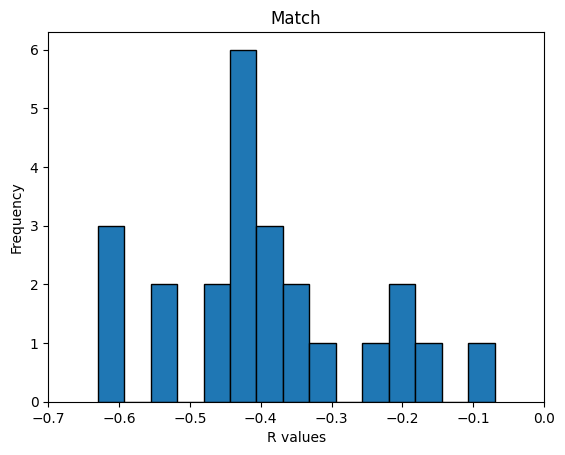

In [28]:
plt.hist(results_match_r, bins=15, edgecolor='black')
plt.xlabel('R values')
plt.ylabel('Frequency')
plt.title('Match')
plt.xlim([-0.7,0])
plt.show()

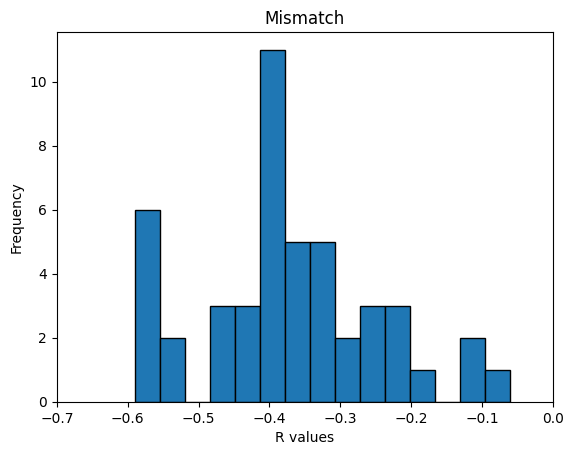

In [29]:
plt.hist(results_mismatch_r, bins=15, edgecolor='black')
plt.xlabel('R values')
plt.ylabel('Frequency')
plt.title('Mismatch')
plt.xlim([-0.7,0])

plt.show()